<a href="https://colab.research.google.com/github/tejusn/doc-ai-exp/blob/main/Learn_Docling_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [ ]:
!pip install docling

## Document Conversion

In [ ]:
from docling.document_converter import DocumentConverter
from IPython.display import display
import json

# source = "https://arxiv.org/pdf/2408.09869"
source = "/content/sample_data/DocLing_2501.17887v1.pdf"
# source = "/content/sample_data/Divya Sandur group project.docx"  # file path or URL
converter = DocumentConverter()
doc = converter.convert(source).document

print(doc.export_to_document_tokens)

FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/DocLing_2501.17887v1.pdf'

In [ ]:
print(doc.export_to_dict())

NameError: name 'doc' is not defined

## Summarize DoclingDocument Structure

In [ ]:
import json

# Create a dictionary with key information from the doc object
doc_summary = {
    "schema_name": doc.schema_name,
    "version": doc.version,
    "name": doc.name,
    "origin": doc.origin.model_dump() if doc.origin else None, # Include origin details
    "furniture_item_count": len(doc.furniture.children) if doc.furniture and hasattr(doc.furniture, 'children') else 0, # Count furniture items
    "body_item_count": len(doc.body.children) if doc.body and hasattr(doc.body, 'children') else 0, # Count body items
    "text_count": len(doc.texts), # Count text items
    "table_count": len(doc.tables), # Count table items
    "picture_count": len(doc.pictures), # Count picture items
    "group_count": len(doc.groups), # Count group items
    # You can add other top-level attributes if needed
    # "metadata": doc.metadata.model_dump() if doc.metadata else None,
}

# Convert the dictionary to a JSON string with indentation for pretty printing
doc_json_summary = json.dumps(doc_summary, indent=4)

print(doc_json_summary)

{
    "schema_name": "DoclingDocument",
    "version": "1.7.0",
    "name": "DocLing_2501.17887v1",
    "origin": {
        "mimetype": "application/pdf",
        "binary_hash": 1554916940463874186,
        "filename": "DocLing_2501.17887v1.pdf",
        "uri": null
    },
    "furniture_item_count": 0,
    "body_item_count": 124,
    "text_count": 287,
    "table_count": 1,
    "picture_count": 6,
    "group_count": 5
}


/tmp/ipython-input-4101283766.py:9: DeprecationWarning: deprecated
  "furniture_item_count": len(doc.furniture.children) if doc.furniture and hasattr(doc.furniture, 'children') else 0, # Count furniture items


### Exploring Text Elements

In [ ]:
display(doc.texts[0].model_dump())

{'self_ref': '#/texts/0',
 'parent': {'cref': '#/body'},
 'children': [],
 'content_layer': <ContentLayer.FURNITURE: 'furniture'>,
 'label': <DocItemLabel.PAGE_HEADER: 'page_header'>,
 'prov': [{'page_no': 1,
   'bbox': {'l': 18.34,
    't': 632.0,
    'r': 36.34,
    'b': 232.0,
    'coord_origin': <CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>},
   'charspan': (0, 40)}],
 'orig': 'arXiv:2501.17887v1  [cs.CL]  27 Jan 2025',
 'text': 'arXiv:2501.17887v1  [cs.CL]  27 Jan 2025',
 'formatting': None,
 'hyperlink': None}

In [ ]:
print("Exploring Text Elements:")
# Iterate through the text items in the document
for i, text_item in enumerate(doc.texts[:10]): # Limit to the first 10 items
    print(f"Text Item {i}:")
    print(f"  Label: {text_item.label}")
    # Print the first 200 characters of the text to avoid overly long output
    print(f"  Text: {text_item.text[:200]}...")
    if hasattr(text_item, 'prov'):
        print(f"  Provenance (first item): Page {text_item.prov[0].page_no}, Bbox: {text_item.prov[0].bbox}")
    print("-" * 20)

Exploring Text Elements:
Text Item 0:
  Label: page_header
  Text: arXiv:2501.17887v1  [cs.CL]  27 Jan 2025...
  Provenance (first item): Page 1, Bbox: l=18.34 t=632.0 r=36.34 b=232.0 coord_origin=<CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>
--------------------
Text Item 1:
  Label: section_header
  Text: Docling: An Efficient Open-Source Toolkit for AI-driven Document Conversion...
  Provenance (first item): Page 1, Bbox: l=63.595 t=693.015 r=548.41 b=680.118 coord_origin=<CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>
--------------------
Text Item 2:
  Label: text
  Text: Nikolaos Livathinos * , Christoph Auer * , Maksym Lysak, Ahmed Nassar, Michele Dolfi, Panagiotis Vagenas, Cesar Berrospi, Matteo Omenetti, Kasper Dinkla, Yusik Kim, Shubham Gupta, Rafael Teixeira de L...
  Provenance (first item): Page 1, Bbox: l=83.779 t=667.68 r=529.449 b=615.089 coord_origin=<CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>
--------------------
Text Item 3:
  Label: text
  Text: IBM Research, R¨ uschlikon, Switzerland..

### Exploring Table Elements

In [ ]:
print("Exploring Table Elements:")
# Iterate through the table items in the document
for i, table_item in enumerate(doc.tables):
    print(f"Table Item {i}:")
    print(f"  Label: {table_item.label}")
    if hasattr(table_item, 'prov'):
        print(f"  Provenance (first item): Page {table_item.prov[0].page_no}, Bbox: {table_item.prov[0].bbox}")

    # Displaying table data can be complex, here's a simple representation
    if hasattr(table_item, 'data') and hasattr(table_item.data, 'table_cells'):
        print(f"  Number of cells: {len(table_item.data.table_cells)}")
        # You can add code here to extract and display table data more formally (like a DataFrame)
        # as shown in the previous examples.
    print("-" * 20)

Exploring Table Elements:
Table Item 0:
  Label: table
  Provenance (first item): Page 5, Bbox: l=155.46766662597656 t=717.3967056274414 r=456.41375732421875 b=637.3744354248047 coord_origin=<CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>
  Number of cells: 23
--------------------


### Exploring Picture Elements

In [ ]:
print("Exploring Picture Elements:")
# Iterate through the picture items in the document
for i, picture_item in enumerate(doc.pictures):
    print(f"Picture Item {i}:")
    print(f"  Label: {picture_item.label}")
    if hasattr(picture_item, 'prov'):
        print(f"  Provenance (first item): Page {picture_item.prov[0].page_no}, Bbox: {picture_item.prov[0].bbox}")
    # You can add code here to display the image as shown in the previous examples.
    print("-" * 20)

Exploring Picture Elements:
Picture Item 0:
  Label: picture
  Provenance (first item): Page 2, Bbox: l=92.13404846191406 t=737.0841445922852 r=514.7477416992188 b=538.5709838867188 coord_origin=<CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>
--------------------
Picture Item 1:
  Label: picture
  Provenance (first item): Page 5, Bbox: l=71.60702514648438 t=615.9085083007812 r=278.9543151855469 b=326.2925720214844 coord_origin=<CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>
--------------------
Picture Item 2:
  Label: picture
  Provenance (first item): Page 5, Bbox: l=356.2509460449219 t=509.60369873046875 r=521.4921264648438 b=343.9695739746094 coord_origin=<CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>
--------------------
Picture Item 3:
  Label: picture
  Provenance (first item): Page 7, Bbox: l=105.40738677978516 t=738.2883567810059 r=506.916748046875 b=540.9850769042969 coord_origin=<CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>
--------------------
Picture Item 4:
  Label: picture
  Provenance (first item): Pag

## Visualize Bounding Boxes

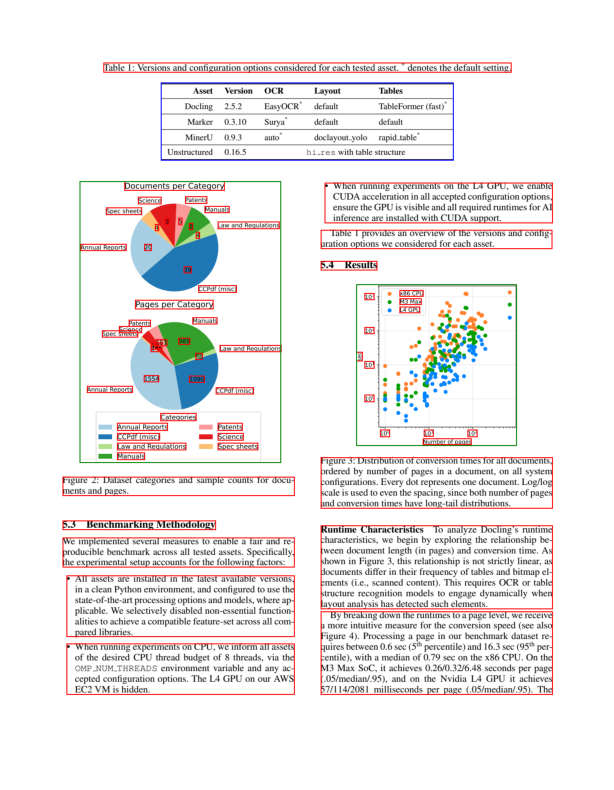

True

In [ ]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import io # Import the io module for handling byte streams

# Assuming the document is a PDF, you might need a way to get an image of a specific page.
# Docling might provide a method for this, or you might need another library like pypdfium2.
# For demonstration, let's assume you have an image file of a page.
# Replace 'path/to/your/page_image.png' with the actual path to your image file.
# If the source is a PDF, you can use pypdfium2 to render a page to an image.

# Example using pypdfium2 (install with !pip install pypdfium2)
import pypdfium2 as pdfium

# Load the PDF document
pdf = pdfium.PdfDocument(source)

# --- Specify the page number here (0-indexed) ---
page_index = 4
# -------------------------------------------------

page = pdf.get_page(page_index)

# Render the page to a PdfBitmap and then convert to PIL Image using to_pil()
bitmap = page.render(scale=2) # Scale up for better resolution
pil_image = bitmap.to_pil()


# Create a drawing object
draw = ImageDraw.Draw(pil_image)

# Iterate through the elements in the document and draw their bounding boxes
# You can choose which elements to visualize (e.g., texts, tables, figures)
# We will check the provenance to ensure the element is on the selected page
for item in doc.texts + doc.tables + doc.pictures + doc.groups: # Include all relevant item types
    if hasattr(item, 'prov'): # Check if the item has provenance information
        for prov_item in item.prov:
            if prov_item.page_no == page_index + 1: # Check if the provenance item is on the current page (page_no is 1-indexed)
                bbox = prov_item.bbox
                # Convert the bbox coordinates to the image's coordinate system (top-left origin)
                # Docling uses BOTTOMLEFT, Pillow uses TOPLEFT
                img_width, img_height = pil_image.size

                # Assuming bbox coordinates are relative to the bottom-left of the page and scaled to 1
                # You might need to scale the bbox coordinates by the image dimensions
                # Example:
                page_width = page.get_width()
                page_height = page.get_height()
                scale_x = img_width / page_width
                scale_y = img_height / page_height

                top_left_x = bbox.l * scale_x
                top_left_y = img_height - (bbox.t * scale_y) # Flip y-axis
                bottom_right_x = bbox.r * scale_x
                bottom_right_y = img_height - (bbox.b * scale_y) # Flip y-axis


                # Draw the rectangle
                # You can customize the color and width based on item type if you want
                color = "red"
                if item in doc.tables:
                    color = "blue"
                elif item in doc.pictures:
                    color = "green"
                elif item in doc.groups:
                    color = "purple"

                draw.rectangle([top_left_x, top_left_y, bottom_right_x, bottom_right_y], outline=color, width=2)

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(pil_image)
plt.axis('off')
plt.show()

# Don't forget to close the PDF document
pdf.close()

## Extract Images and Charts with Associated Text

Extracting images and charts from page 5:

Found image or chart:


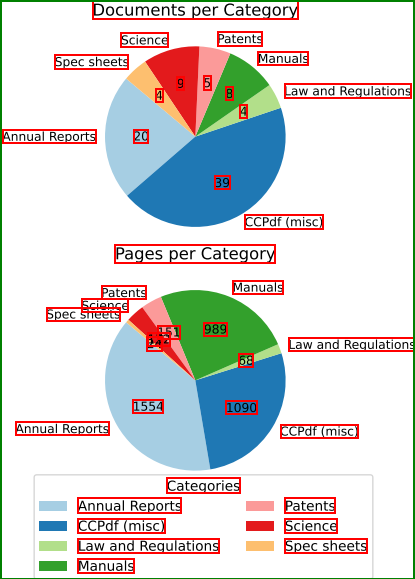

Associated Text:
Figure 2: Dataset categories and sample counts for documents and pages.
Annual Reports
20
CCPdf (misc)
39
Law and Regulations
4
Manuals
8
Patents
5
Science
9
Spec sheets
4
Documents per Category
Annual Reports
1554
CCPdf (misc)
1090
Law and Regulations
68
Manuals
989
Patents
151
Science
132
Spec sheets
24
Pages per Category
Categories
Annual Reports
CCPdf (misc)
Law and Regulations
Manuals
Patents
Science
Spec sheets
Figure 2: Dataset categories and sample counts for documents and pages.

Found image or chart:


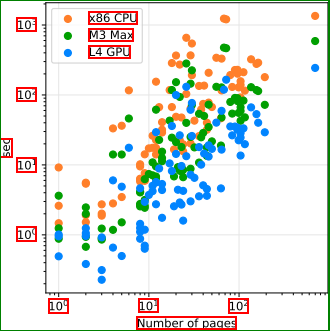

Associated Text:
Figure 3: Distribution of conversion times for all documents, ordered by number of pages in a document, on all system configurations. Every dot represents one document. Log/log scale is used to even the spacing, since both number of pages and conversion times have long-tail distributions.
10 0
10 1
10 2
Number of pages
10 0
10 1
10 2
10 3
sec
x86 CPU
M3 Max
L4 GPU
Figure 3: Distribution of conversion times for all documents, ordered by number of pages in a document, on all system configurations. Every dot represents one document. Log/log scale is used to even the spacing, since both number of pages and conversion times have long-tail distributions.


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import pypdfium2 as pdfium # Import pypdfium2

# Get the page index and the rendered image from the previous visualization cell
# Make sure to run the visualization cell first to set these variables
try:
    page_to_extract = page_index + 1 # Convert 0-indexed page_index to 1-indexed page_no
    pil_image_page = pil_image # Use the PIL image of the page from the previous cell
    # Re-obtain the page object within this cell
    pdf = pdfium.PdfDocument(source) # Load the PDF again
    page = pdf.get_page(page_index) # Get the specific page
except NameError:
    print("Please run the visualization cell first to define 'page_index' and generate 'pil_image'.")
    page_to_extract = None
    pil_image_page = None
    page = None # Ensure page is None if previous variables are not set

if page_to_extract is not None and pil_image_page is not None and page is not None:
    print(f"Extracting images and charts from page {page_to_extract}:")
    for item in doc.pictures:
        # Check if the item is on the specified page
        item_on_page = False
        if hasattr(item, 'prov'):
            for prov_item in item.prov:
                if prov_item.page_no == page_to_extract:
                    item_on_page = True
                    bbox = prov_item.bbox # Get the bounding box
                    break # Found provenance on the target page, no need to check further

        if item_on_page:
            print(f"\nFound image or chart:")
            if bbox:
                # Convert the bbox coordinates to the image's coordinate system (top-left origin)
                # Docling uses BOTTOMLEFT, Pillow uses TOPLEFT
                img_width, img_height = pil_image_page.size
                page_width = page.get_width()
                page_height = page.get_height()
                scale_x = img_width / page_width
                scale_y = img_height / page_height

                top_left_x = bbox.l * scale_x
                top_left_y = img_height - (bbox.t * scale_y) # Flip y-axis
                bottom_right_x = bbox.r * scale_x
                bottom_right_y = img_height - (bbox.b * scale_y) # Flip y-axis

                # Crop the image using the bounding box
                try:
                    cropped_img = pil_image_page.crop((top_left_x, top_left_y, bottom_right_x, bottom_right_y))
                    display(cropped_img)

                    # Attempt to find and print associated text
                    associated_text = []
                    if hasattr(item, 'children'):
                        for child_ref in item.children:
                            # Assuming children are text references
                            if child_ref.cref.startswith('#/texts/'):
                                text_index = int(child_ref.cref.split('/')[-1])
                                if text_index < len(doc.texts):
                                    associated_text.append(doc.texts[text_index].text)
                    # Also check for captions attribute if available
                    if hasattr(item, 'captions'):
                        for caption_ref in item.captions:
                              if caption_ref.cref.startswith('#/texts/'):
                                text_index = int(caption_ref.cref.split('/')[-1])
                                if text_index < len(doc.texts):
                                    associated_text.append(doc.texts[text_index].text)

                    if associated_text:
                        print("Associated Text:")
                        for text in associated_text:
                            print(text)
                    else:
                        print("No directly associated text found in children or captions.")


                except Exception as e:
                    print(f"Could not crop or display image: {e}")
            else:
                print("No bounding box found for this image item.")

    # Don't forget to close the PDF document
    pdf.close()
else:
    print("Could not proceed with image extraction because required variables or page object were not available.")

## Extract Table Data

In [ ]:
import pandas as pd

# Get the page index from the previous cell
# Make sure to run the previous cell first to set the page_index variable
try:
    page_to_extract = page_index + 1 # Convert 0-indexed page_index to 1-indexed page_no
except NameError:
    print("Please run the previous cell first to define 'page_index'.")
    page_to_extract = None

if page_to_extract is not None:
    print(f"Extracting tables from page {page_to_extract}:")
    for table_item in doc.tables:
        # Check if the table is on the specified page
        table_on_page = False
        if hasattr(table_item, 'prov'):
            for prov_item in table_item.prov:
                if prov_item.page_no == page_to_extract:
                    table_on_page = True
                    break # Found provenance on the target page, no need to check further

        if table_on_page:
            print(f"\nFound table:")
            # Extract table data into a list of lists
            table_data = []
            if hasattr(table_item, 'data') and hasattr(table_item.data, 'table_cells'):
                # Sort cells by row and then by column for correct order
                sorted_cells = sorted(table_item.data.table_cells, key=lambda cell: (cell.start_row_offset_idx, cell.start_col_offset_idx))

                # Determine the number of rows and columns
                max_row = max(cell.end_row_offset_idx for cell in sorted_cells) if sorted_cells else 0
                max_col = max(cell.end_col_offset_idx for cell in sorted_cells) if sorted_cells else 0

                # Initialize table_data with empty strings
                table_data = [['' for _ in range(max_col)] for _ in range(max_row)]

                # Fill table_data with cell text, considering row and column spans
                for cell in sorted_cells:
                    for r in range(cell.start_row_offset_idx, cell.end_row_offset_idx):
                        for c in range(cell.start_col_offset_idx, cell.end_col_offset_idx):
                            if r < max_row and c < max_col: # Ensure within bounds
                                table_data[r][c] = cell.text

            # Display the table data, for example as a pandas DataFrame
            if table_data:
                try:
                    df = pd.DataFrame(table_data)
                    display(df)
                except Exception as e:
                    print(f"Could not display table as DataFrame: {e}")
                    print("Raw table data:")
                    print(table_data)
            else:
                print("No cells found for this table.")

Extracting tables from page 5:

Found table:


,0,1,2,3,4
0,Asset,Version,OCR,Layout,Tables
1,Docling,2.5.2,EasyOCR *,default,TableFormer (fast) *
2,Marker,0.3.10,Surya *,default,default
3,MinerU,0.9.3,auto *,doclayout yolo,rapid table *
4,Unstructured,0.16.5,,hi res with table structure,hi res with table structure
